In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.shape

(400, 3)

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
35,35,27000,0
293,37,77000,0
149,20,74000,0
59,32,117000,0
94,29,83000,0


### Train Test Split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Purchased'],axis=1),
                                                df['Purchased'],
                                                test_size = 0.2,
                                                random_state= 0)
X_train.shape,X_test.shape

((320, 2), (80, 2))

# Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
# fit scaler to train dataset 
sc.fit(X_train)

# apply scaler to both train and test dataset
X_train_scaled = sc.transform(X_train)
X_test_scaled  = sc.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns= X_test.columns)

In [11]:
X_train.head()

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000


In [12]:
X_train_scaled.head()

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024


In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


- As we can see after applying Standard scaler mean is become 0 and standard deviation is scaled down to 1.

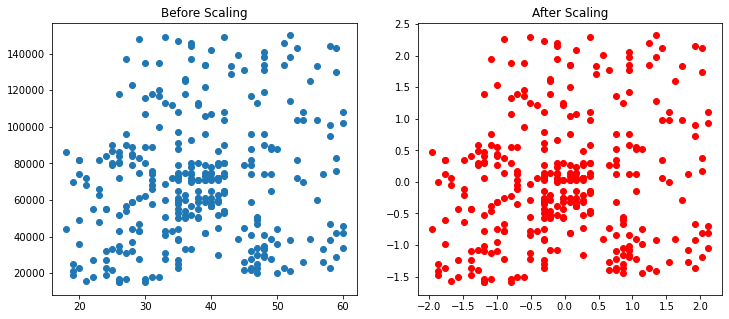

In [15]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))

ax[0].scatter(X_train['Age'],X_train['EstimatedSalary'])
ax[0].set_title("Before Scaling")
ax[1].scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax[1].set_title("After Scaling")

plt.show()

## Comaparison of Distributions

<AxesSubplot:title={'center':'Age distribution after Standard Scaling'}, xlabel='Age', ylabel='Density'>

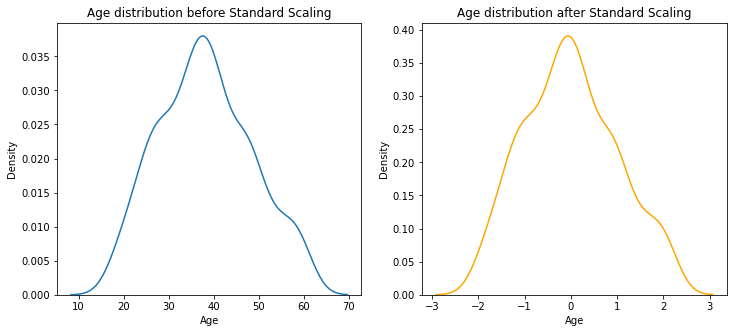

In [16]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))

ax[0].set_title('Age distribution before Standard Scaling')
sns.kdeplot(X_train['Age'],ax=ax[0])

ax[1].set_title('Age distribution after Standard Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax[1],color='orange')

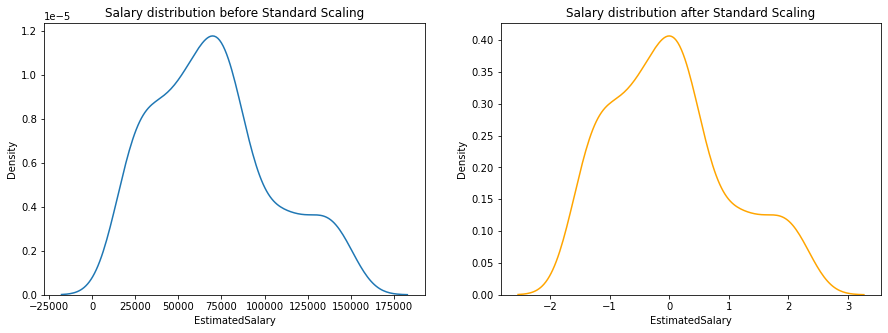

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].set_title('Salary distribution before Standard Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax[0])

ax[1].set_title('Salary distribution after Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax[1],color='orange')

plt.show()

- We could noticed that there is no difference in terms of distibutions for both Age and Salary columns
- After scalling only the range is scaled down from the original to a fixed range for both columns.

## Now we will check whether Scalling improves model performance

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# Create model for both scaled and non-scaled data
reg = LogisticRegression()
reg_sc = LogisticRegression()

In [20]:
# fit and predict for non-scaled data
reg.fit(X_train,y_train)
y_pred =reg.predict(X_test)

In [21]:
# fit and predict for scaled data
reg_sc.fit(X_train_scaled,y_train)
y_pred_sc = reg_sc.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# check the accuracy score for non-scaled and scaled data
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_sc))

Actual 0.725
Scaled 0.925


We could noticed that model gives better result with scaled data